In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset.head(5)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True) #Removing the first column like dummies

In [5]:
dataset.head(5)

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [8]:
dependent=dataset[['charges']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(independent,dependent,test_size=0.30, random_state=0)

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='random')
regressor.fit(X_train,y_train)

,criterion,'poisson'
,splitter,'random'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

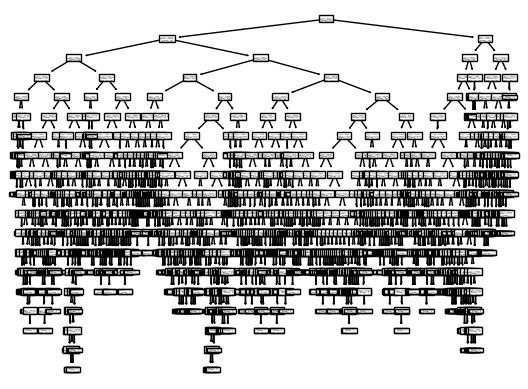

In [46]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show

In [47]:
y_pred=regressor.predict(X_test) #model evaluation metric ymeans-output-predict the output based on the input test data

In [48]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [49]:
r_score

0.6892690762093842